In [1]:
%matplotlib widget
import jungfrau_utils as ju
import numpy as np
import json, h5py
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from ipyfilechooser import FileChooser
from scipy.stats.stats import pearsonr

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *

import warnings
warnings.filterwarnings('ignore')

# Load mono scan

In [2]:
pgroup='p21604'
runnumber = 16

print ('run: {:04d}'.format(runnumber))

#############################################################
jsonfile = ''
jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runnumber))[0]
titlestring = str(pgroup + ' --- ' +jsonfile.split('/')[-3])
run_name = jsonfile.split('/')[-3]
jsonfile

run: 0016


'/sf/alvra/data/p21604/raw/run0016-CuXP_XANES_static_0p5eVsteps/meta/scan.json'

In [3]:
quantile_corr = 0.5

detector_XAS = channel_diode_2
detector_Izero = channel_Izero110

#######################################################################################################33
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)

(DataFluo, Izero, correlation, Energy_eV) = \
XAS_scan_1diode_static(scan, detector_XAS, detector_Izero, quantile_corr)

Processing: run0016-CuXP_XANES_static_0p5eVsteps
Step 61 of 61: Processing acq0061

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet      501 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:PR1_CH2_VAL_GET 501 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS110:INTENSITY    501 / 501 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 501 / 501 -> 0% loss
complete channels: 3 / 3 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
249 shots out of 501 survived
Step 61 of 61: Processed acq0061
correlation Diode (all shots) = 0.997096649421955
------------------------------
Processed 61 out of 61 files


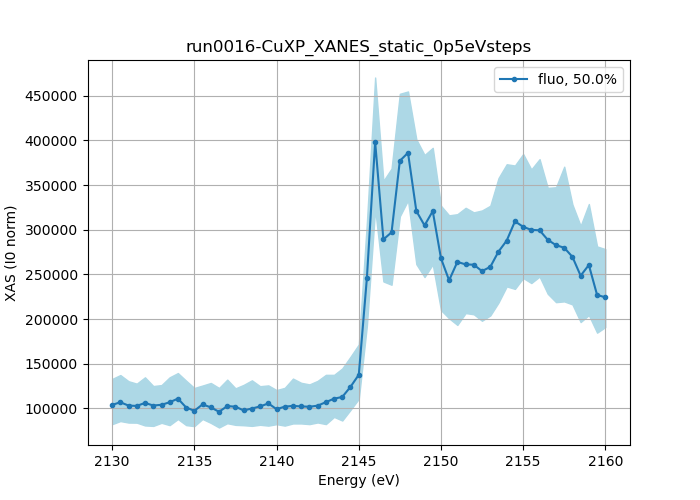

In [6]:
plt.figure(figsize = (7,5))

XAS = DataFluo[:,0]
err_low = DataFluo[:,1]
err_high = DataFluo[:,2]

plt.plot(Energy_eV, XAS, label='{}, {}%'.format('fluo', quantile_corr*100),marker='.')
plt.fill_between(Energy_eV, err_low, err_high, color='lightblue')

#plt.plot(Energy_eV, (XAS2-XAS2[0])/sum(XAS2-XAS2[0]), label='{}, {}%'.format('APD2', quantile_corr*100),marker='.')
#plt.fill_between(Energy_eV, err_low2, err_high2, color='navajowhite')


plt.xlabel("Energy (eV)")
plt.ylabel ("XAS (I0 norm)")
plt.gca().set_title('XAS (fluo)')
plt.legend(loc="best")
plt.title(jsonfile.split('/')[-3], fontsize=12)
plt.grid()

plt.show()

#plt.savefig(savedir+'/XANES_RhAcac.png')

## Check correlation for a certain energy point

In [16]:
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)
Energy_eV = scan.readbacks

chosen_energy = 6553

detector_XAS = channel_diode_2
detector_Izero = channel_Izero117

quantile_corr = 0.8
##################################################################3
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo, Izero, Fluo_filter, Izero_filter) = \
Get_correlation_from_scan_static(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

print ('Energy = {} eV'.format(Energy_eV[index_energy]))

(800,) shots out of (1000,) survived
Energy = 6553.0920800572185 eV


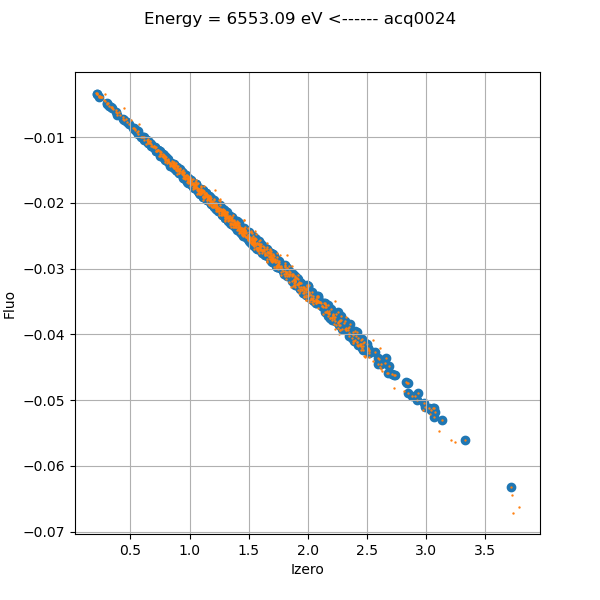

In [17]:
plt.figure(figsize=(6,6))
plt.suptitle('Energy = {:.2f} eV <------ {}'.format(Energy_eV[index_energy], scan.files[index_energy][1].split('/')[-1].split('.')[0]))
plt.scatter(Izero_filter, Fluo_filter)
plt.scatter(Izero, Fluo, s = 0.5)
plt.xlabel('Izero')
plt.ylabel('Fluo')
plt.grid()
plt.show()

In [ ]:
savedir = '/das/work/p19/p19262/Export/'
os.makedirs(savedir, exist_ok=True)
print (savedir)

In [ ]:
np.save(savedir+'XAS_Rhacac', XAS)